# Intro to Lasers - Homework 0

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.

**<span style="color:#ff5555;">You will need to complete the questions in this jupyter notebook and submit it via `gitlab`</span>**

## <span style="color: #0099ff;">Readings
Chapter 1 of *Lasers* by Seigman: [Free eBook](https://opg-optica-org.libezproxy2.syr.edu/content/bookshelf/book/item/lasers)

### <span style="color: #ff9900;">Technical requirements</span>
#### `python`
You will need to know `python` to be successful in this class.\
Part of the goal of this class will be to develop your coding ability, and create plots as to illustrate your analytic results.
You will need to develop expertise in the following `python` packages:
1. numpy
2. matplotlib
3. jupyter
4. sympy

#### $\LaTeX$
Also, $\LaTeX$ is required for this class.\
For most syntax, surround your math statements with dollar signs:\
\
\\$ y = m x + b \\$ $\qquad \rightarrow \qquad y = m x + b$

#### `jupyter notebook`
`jupyter` notebooks like this have multiple blocks called 'cells', that can be either `Code`, `Markdown`, or `Raw`.\
This one is `Markdown`, and so allows us to use LaTeX and other Markdown techniques.

Any cell can be run by hitting `Shift + Enter` at any time.\
If the cell is `Code`, the `python` code will be run.\
If the cell is `Markdown`, the markdown in the cell will be interpreted and displayed.\
This allows for quick interactive feedback on whether your code is working or not.

### <span style="color: #ff9900;">Homework Submission Expectations</span>
Some questions will require you to do a calculation in `python`,\
others will require a plot to be produced and displayed via `matplotlib`,\
and still others will ask for a mathematical derivation.\
For the derivations, they may be done either by pencil and paper and transcribed to $\LaTeX$ in a `Markdown` cell,
or directly in `sympy` in a `Code` cell.



### <span style="color: #ff9900;">Tech References</span>
1. [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
2. [Latex reference](https://www.overleaf.com/learn/latex/Mathematical_expressions)
3. [Markdown Cheat Sheet](https://support.squarespace.com/hc/en-us/articles/206543587-Markdown-cheat-sheet)

### <span style="color: #ff9900;">Science References</span>
1. [Online Periodic Table](https://artsexperiments.withgoogle.com/periodic-table/?exp=true&lang=en)



In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# <span style="color:#ffaaff;">Approximations Review</span>
In this course, you will need to remember and use some basic approximations.
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


## Question 1: Binomial Approximation
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

### <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

### <span style="color:#ff5555;">Question 1A Solution:</span> (Filled out as an example)
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

### <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

### <span style="color:#ff5555;">Question 1 Solution:</span>

### <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

In [2]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [3]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-0.999, 2, 100)

# TODO: Fill these out correctly
taylor0 = np.zeros_like(xx)
taylor1 = np.zeros_like(xx)
taylor2 = np.zeros_like(xx)
taylor3 = np.zeros_like(xx)

In [4]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.00066667 0.00066667 0.00066667]


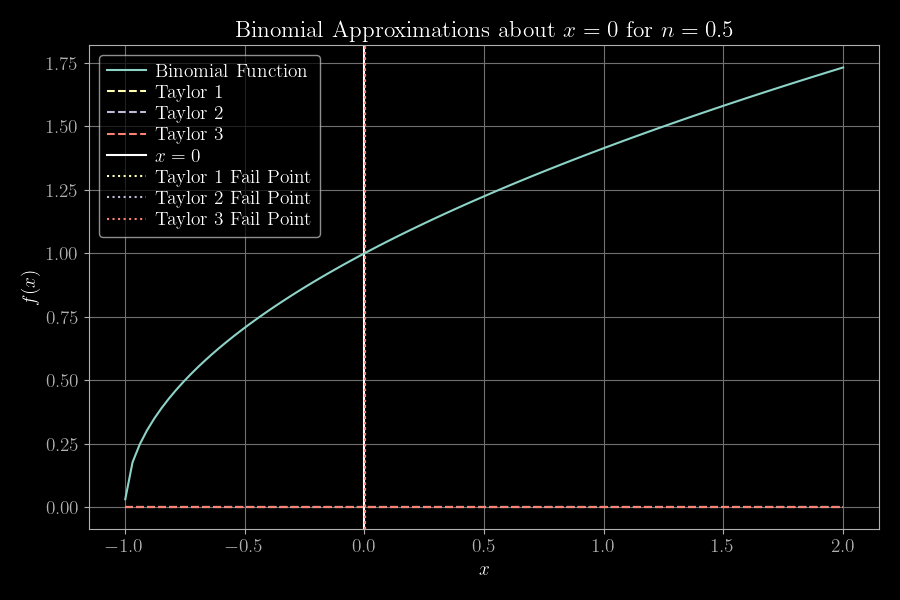

In [5]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), zorder=10, label="Binomial Function") # zorder changes the plotting order
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=r"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Fail Point")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# Coherence Length

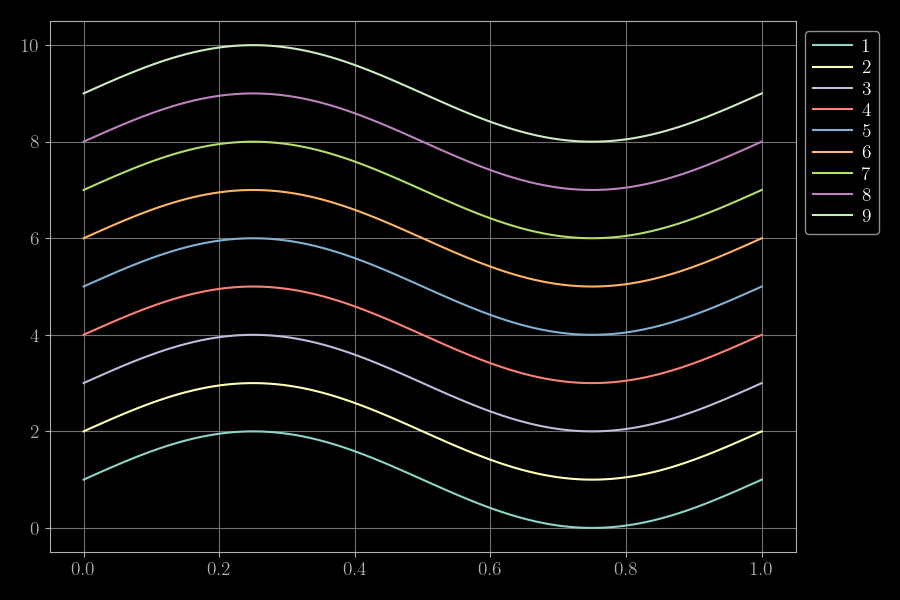

In [8]:
tt = np.linspace(0, 1, 100)
omega1 = 2 * np.pi * 1
fig, s1 = plt.subplots(1);
for ii in np.arange(1,10):
    s1.plot(tt, np.sin(omega1 * tt) + ii, label=f"{ii}")
s1.grid()
s1.legend(bbox_to_anchor=(1.0, 1))

interactive(children=(FloatSlider(value=1.0, description='ww', max=3.0, min=-1.0), Output()), _dom_classes=('w…

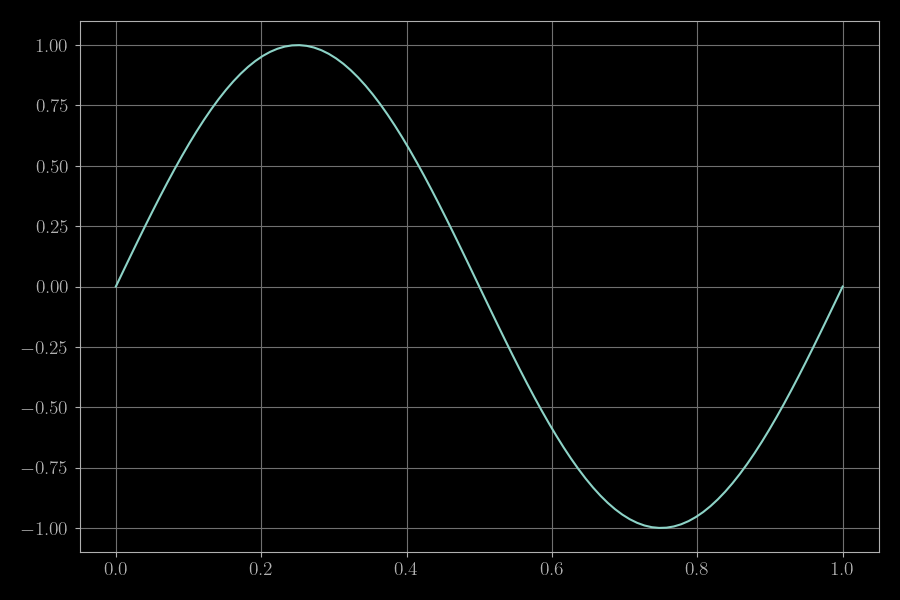

In [9]:
xx = np.linspace(0, 1, 100)
kk = 2 * np.pi 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(xx, np.sin(kk * xx))
ax.grid()

def update(ww = 1.0):
    line.set_ydata(np.sin(ww  * kk * xx))
    fig.canvas.draw_idle()

interact(update);